# Set-up

In [ ]:
import wrds
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# Get the current working directory
script_dir = os.getcwd()
fig_dir = '/Users/zrsong/MIT Dropbox/Zirui Song/Apps/Overleaf/Information Covenants of Nonbank Direct Lending/Figures'

# Set the working directory to the current script's directory (which in this case is already the working directory)
os.chdir(script_dir)

print(f"Working directory is set to: {script_dir}")


Working directory is set to: /Users/zrsong/MIT Dropbox/Zirui Song/Research Projects/Direct Lending/Code


In [4]:
# import from Data/Cleaned folder
data = pd.read_csv('../Data/Cleaned/final_regression_sample.csv')

# Deal Counts and Shares

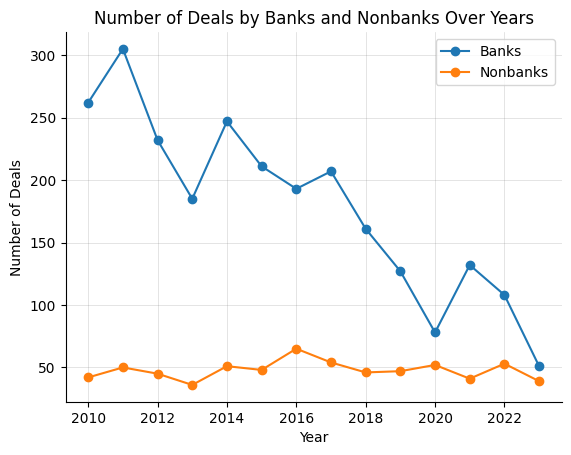

In [ ]:
# Group by year and nonbank_lender, then count the number of deals
deals_by_year = data.groupby(['year', 'nonbank_lender']).size().unstack()

# Plot the data
deals_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.title('Number of Deals by Banks and Nonbanks Over Years')
plt.legend(['Banks', 'Nonbanks'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade

# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save to fig_dir as png
plt.savefig(f"{fig_dir}/dealcounts_by_year.png", dpi=300, bbox_inches='tight')


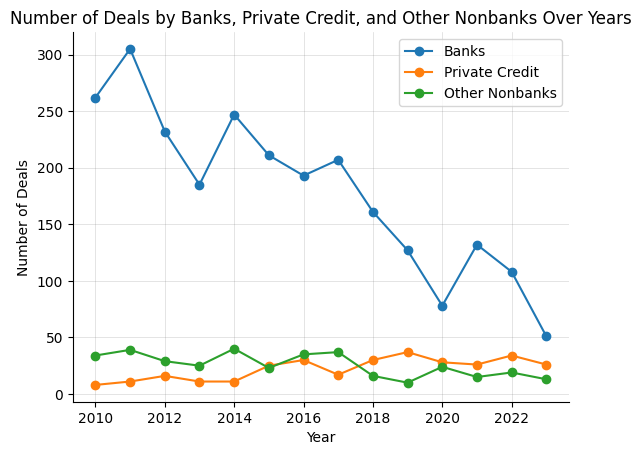

In [6]:
# Filter data for banks, private credit lenders, and other nonbanks
banks = data[data['nonbank_lender'] == 0]
private_credit = data[data['private_credit_lender'] == 1]
other_nonbanks = data[data['other_nonbank_lender'] == 1]

# Group by year and count the number of deals for each group
deals_by_year_banks = banks.groupby('year').size()
deals_by_year_private_credit = private_credit.groupby('year').size()
deals_by_year_other_nonbanks = other_nonbanks.groupby('year').size()

# Create a DataFrame to hold the counts
deals_by_year_combined = pd.DataFrame({
    'Banks': deals_by_year_banks,
    'Private Credit': deals_by_year_private_credit,
    'Other Nonbanks': deals_by_year_other_nonbanks
})

# Plot the data
deals_by_year_combined.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.title('Number of Deals by Banks, Private Credit, and Other Nonbanks Over Years')
plt.legend(['Banks', 'Private Credit', 'Other Nonbanks'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade

# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save to fig_dir as png
plt.savefig(f"{fig_dir}/dealcounts_by_lender_type.png", dpi=300, bbox_inches='tight')

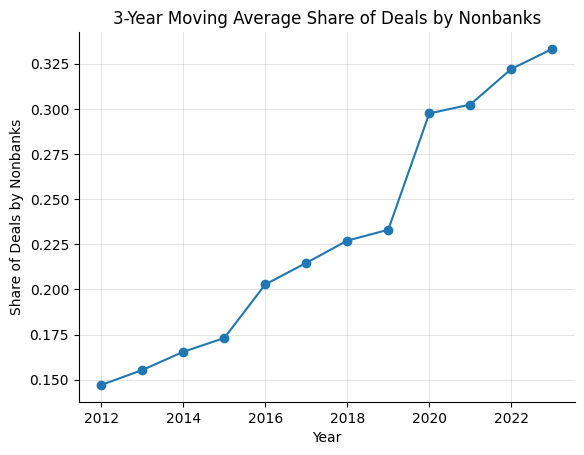

In [7]:
# Calculate the 3-year moving average of the share of deals by nonbanks
# Calculate the share of deals by nonbanks
deals_by_year['Nonbank_Share'] = deals_by_year[1] / (deals_by_year[0] + deals_by_year[1])

# Calculate the 3-year moving average of the share of deals by nonbanks
deals_by_year['Nonbank_Share_MA'] = deals_by_year['Nonbank_Share'].rolling(window=3).mean()

# Plot the 3-year moving average of the share of deals by nonbanks over the years
deals_by_year['Nonbank_Share_MA'].plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Share of Deals by Nonbanks')
plt.title('3-Year Moving Average Share of Deals by Nonbanks')
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade
# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# save to fig_dir as png
plt.savefig(f"{fig_dir}/dealshares_by_year.png", dpi=300, bbox_inches='tight')

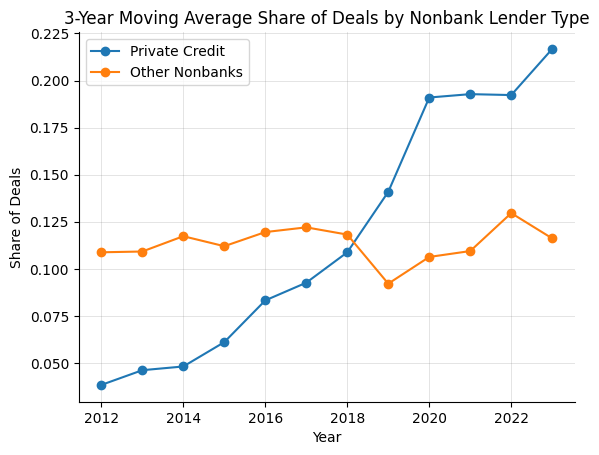

In [8]:
# Calculate the share of deals for private credit, and other nonbanks
deals_by_year_combined['Private_Credit_Share'] = deals_by_year_combined['Private Credit'] / deals_by_year_combined.sum(axis=1)
deals_by_year_combined['Other_Nonbank_Share'] = deals_by_year_combined['Other Nonbanks'] / deals_by_year_combined.sum(axis=1)

# Calculate the 3-year moving average of the share of deals for private credit, and other nonbanks
deals_by_year_combined['Private_Credit_Share_MA'] = deals_by_year_combined['Private_Credit_Share'].rolling(window=3).mean()
deals_by_year_combined['Other_Nonbank_Share_MA'] = deals_by_year_combined['Other_Nonbank_Share'].rolling(window=3).mean()

# Plot the 3-year moving average of the share of deals for banks, private credit, and other nonbanks over the years
deals_by_year_combined[['Private_Credit_Share_MA', 'Other_Nonbank_Share_MA']].plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Share of Deals')
plt.title('3-Year Moving Average Share of Deals by Nonbank Lender Type')
plt.legend(['Private Credit', 'Other Nonbanks'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)  # Enable grid with lighter shade
# Remove the boxes around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save to fig_dir as png
plt.savefig(f"{fig_dir}/dealshares_by_lender_type.png", dpi=300, bbox_inches='tight')

# Information Covenant Usage

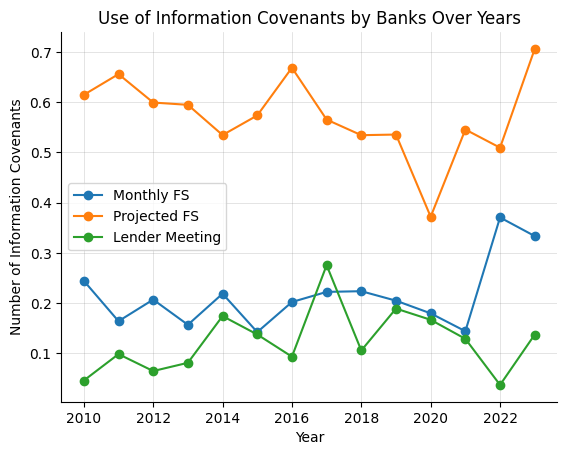

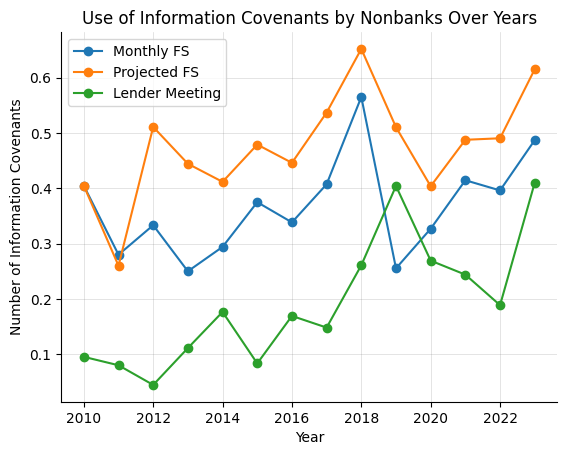

In [9]:
# rename monthly_fs to monthly_financial_statement and projected_fs to projected_financial_statement
data.rename(columns={'monthly_fs': 'monthly_financial_statement', 'projected_fs': 'projected_financial_statement'}, inplace=True)

# Filter data for banks and nonbanks
banks = data[data['nonbank_lender'] == 0]
nonbanks = data[data['nonbank_lender'] == 1]

# Define the three types of information covenants
info_covenants = ['monthly_financial_statement', 'projected_financial_statement', 'lender_meeting']

# Group by year and count the occurrences of each type of information covenant for banks
banks_info_covenants = banks.groupby('year')[info_covenants].mean()

# Group by year and count the occurrences of each type of information covenant for nonbanks
nonbanks_info_covenants = nonbanks.groupby('year')[info_covenants].mean()

# Plot the data for banks
banks_info_covenants.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Information Covenants')
plt.title('Use of Information Covenants by Banks Over Years')
plt.legend(['Monthly FS', 'Projected FS', 'Lender Meeting'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(fig_dir + 'info_covenants_by_banks.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot the data for nonbanks
nonbanks_info_covenants.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Information Covenants')
plt.title('Use of Information Covenants by Nonbanks Over Years')
plt.legend(['Monthly FS', 'Projected FS', 'Lender Meeting'])
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(f"{fig_dir}/info_covenants_by_nonbanks.png", dpi=300, bbox_inches='tight')


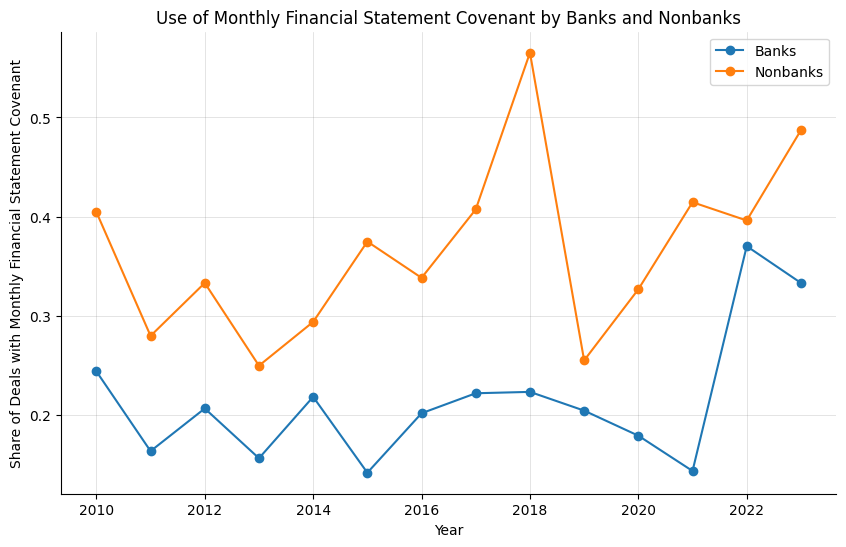

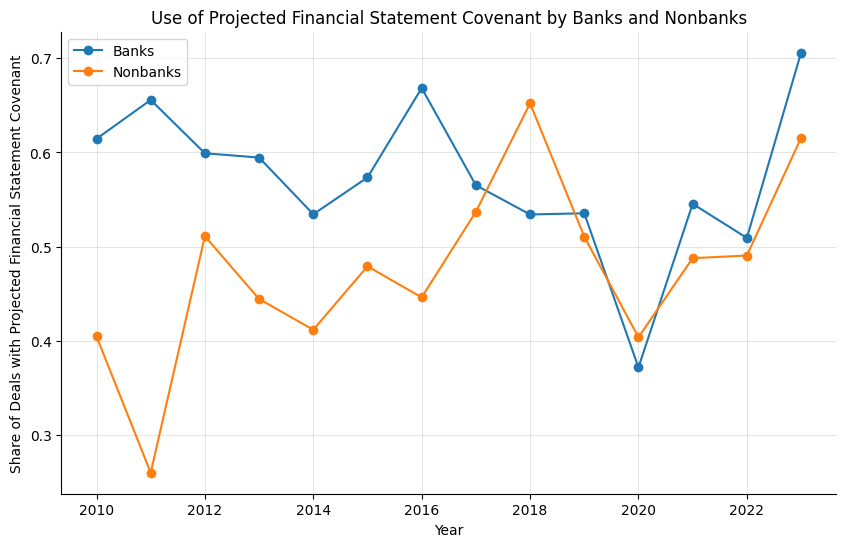

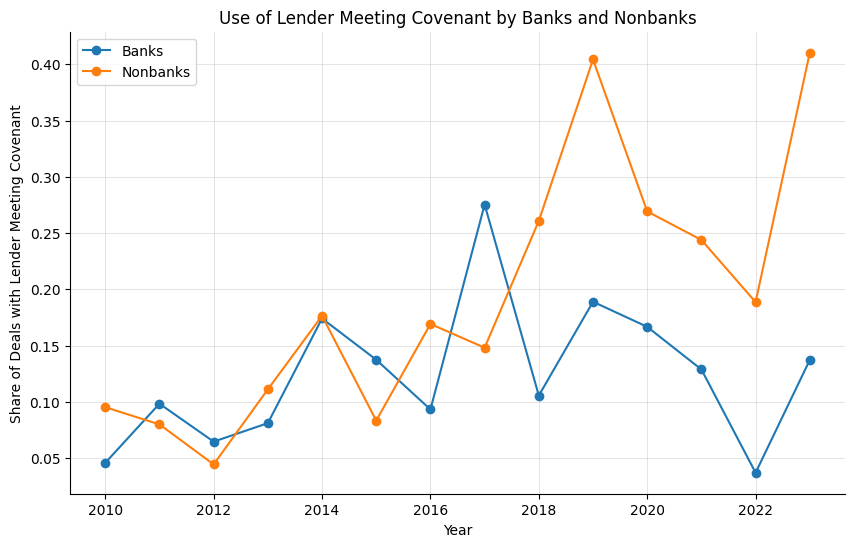

In [10]:
for covenant in info_covenants:
    plt.figure(figsize=(10, 6))
    plt.plot(banks_info_covenants.index, banks_info_covenants[covenant], marker='o', label='Banks')
    plt.plot(nonbanks_info_covenants.index, nonbanks_info_covenants[covenant], marker='o', label='Nonbanks')

    plt.xlabel('Year')
    plt.ylabel(f"Share of Deals with {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant")
    plt.title(f"Use of {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant by Banks and Nonbanks")
    plt.legend()
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Save to fig_dir as png
    plt.savefig(f"{fig_dir}/{covenant}_use_by_banks_and_nonbanks.png", dpi=300, bbox_inches='tight')
    plt.show()

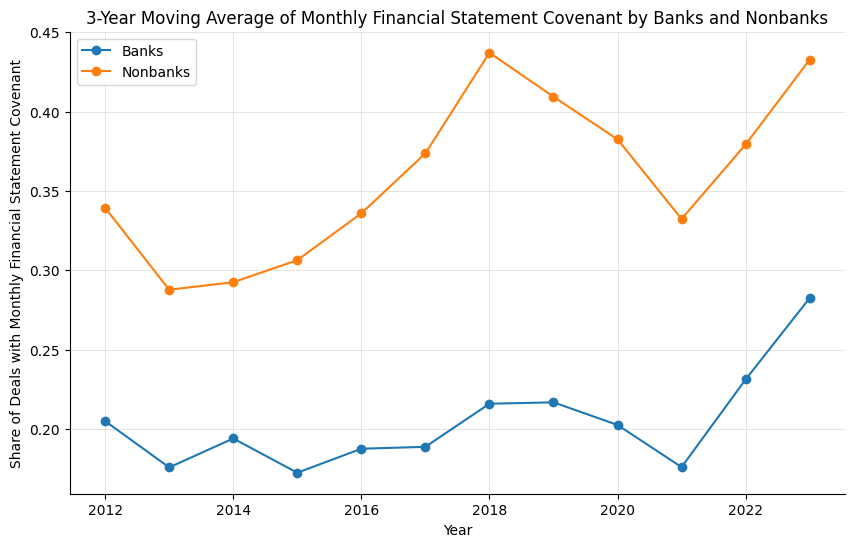

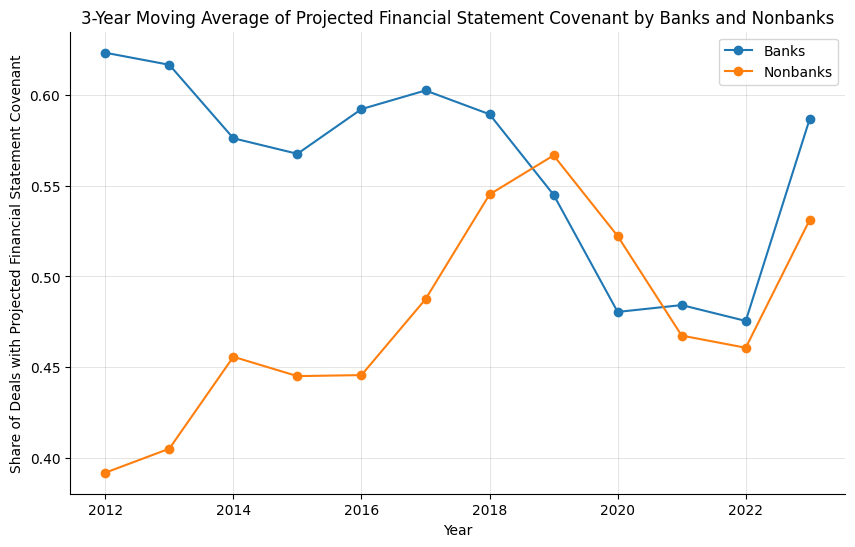

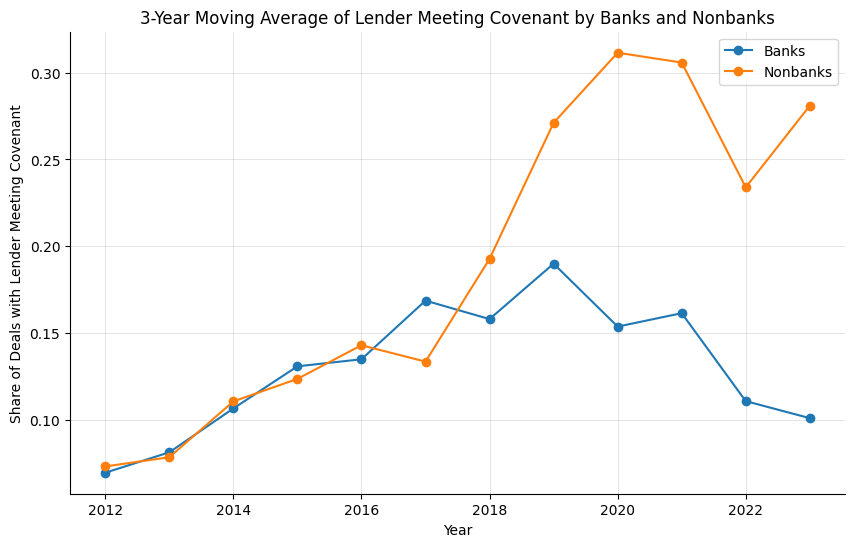

In [11]:
# Calculate the 3-year moving average for banks and nonbanks
banks_info_covenants_ma = banks_info_covenants.rolling(window=3).mean()
nonbanks_info_covenants_ma = nonbanks_info_covenants.rolling(window=3).mean()

# Plot the 3-year moving average for each covenant type by banks and nonbanks
for covenant in info_covenants:
    plt.figure(figsize=(10, 6))
    plt.plot(banks_info_covenants_ma.index, banks_info_covenants_ma[covenant], marker='o', label='Banks')
    plt.plot(nonbanks_info_covenants_ma.index, nonbanks_info_covenants_ma[covenant], marker='o', label='Nonbanks')

    plt.xlabel('Year')
    plt.ylabel(f"Share of Deals with {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant")
    plt.title(f"3-Year Moving Average of {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant by Banks and Nonbanks")
    plt.legend()
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Save to fig_dir as png
    plt.savefig(f"{fig_dir}/{covenant}_use_by_banks_and_nonbanks_ma.png", dpi=300, bbox_inches='tight')
    plt.show()

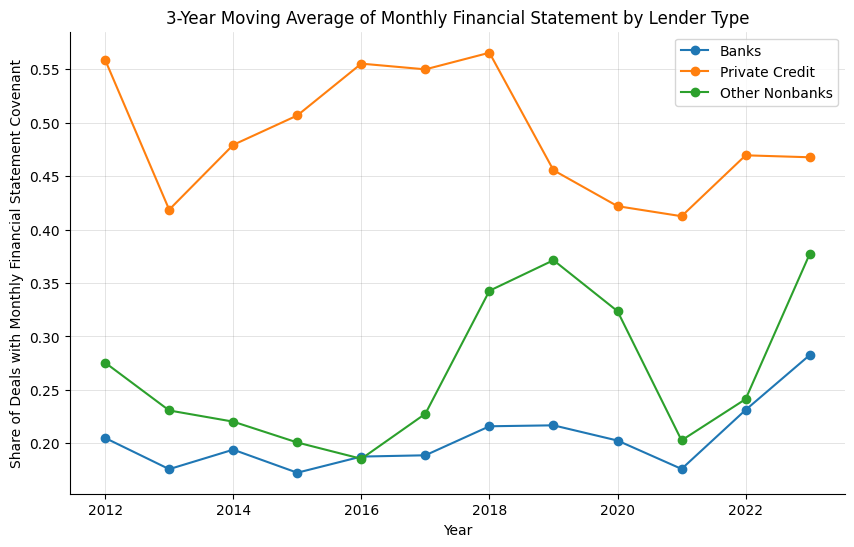

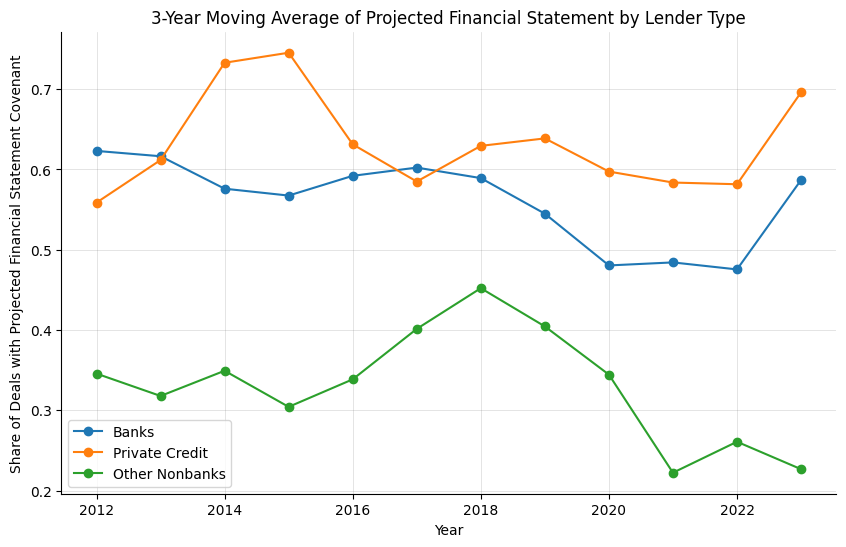

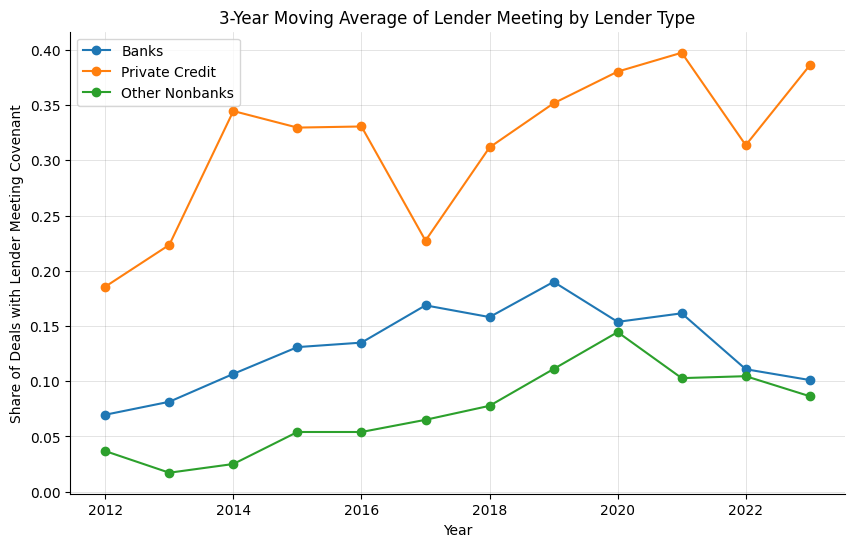

In [12]:
# Calculate the 3-year moving average for banks, private credit, and other nonbanks
banks_info_covenants_ma = banks_info_covenants.rolling(window=3).mean()

# Create copies and rename columns in private_credit and other_nonbanks
private_credit_copy = private_credit.copy()
private_credit_copy.rename(columns={'monthly_fs': 'monthly_financial_statement', 'projected_fs': 'projected_financial_statement'}, inplace=True)
other_nonbanks_copy = other_nonbanks.copy()
other_nonbanks_copy.rename(columns={'monthly_fs': 'monthly_financial_statement', 'projected_fs': 'projected_financial_statement'}, inplace=True)

# Plot the 3-year moving average for each covenant type by banks, private credit, and other nonbanks
for covenant in info_covenants:
    private_credit_info_covenants_ma = private_credit_copy.groupby('year')[info_covenants].mean().rolling(window=3).mean()
    other_nonbanks_info_covenants_ma = other_nonbanks_copy.groupby('year')[info_covenants].mean().rolling(window=3).mean()
    plt.figure(figsize=(10, 6))
    plt.plot(banks_info_covenants_ma.index, banks_info_covenants_ma[covenant], marker='o', label='Banks')
    plt.plot(private_credit_info_covenants_ma.index, private_credit_info_covenants_ma[covenant], marker='o', label='Private Credit')
    plt.plot(other_nonbanks_info_covenants_ma.index, other_nonbanks_info_covenants_ma[covenant], marker='o', label='Other Nonbanks')

    plt.xlabel('Year')
    plt.ylabel(f"Share of Deals with {' '.join([word.capitalize() for word in covenant.split('_')])} Covenant")
    plt.title(f"3-Year Moving Average of {' '.join([word.capitalize() for word in covenant.split('_')])} by Lender Type")
    plt.legend()
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Save to fig_dir as png
    plt.savefig(f"{fig_dir}/{covenant}_use_by_lender_type_ma.png", dpi=300, bbox_inches='tight')
    plt.show()

# OCC-Regulation

In [13]:
# Extract unique bank names from the 'lead_arranger' column
lead_arranger_names = banks['lead_arranger'].unique().tolist()

# Print the list of lead arranger names
print(lead_arranger_names)
# Create a DataFrame with lead_arranger and the number of deals that is the number of unique observations for that lead_arranger
deals_per_lead_arranger = banks.groupby('lead_arranger').size().reset_index(name='Number of Deals')

# Print the DataFrame
print(deals_per_lead_arranger)

['Wachovia Bank', 'ABN AMRO Bank', 'WELLS FARGO BANK, NATIONAL ASSOCIATION', 'JPMorgan Chase Bank, N.A.', 'Bridgewater Bank', 'Bank of America, N.A.', 'DEUTSCHE BANK TRUST COMPANY AMERICAS', 'Union Bank, n.a.', 'Bank of America, n.a.', 'Wells Fargo Bank, National Association', 'WELLS FARGO BANK, N.A.', 'Silicon Valley Bank', 'JPMORGAN CHASE BANK, N.A.', 'PNC Bank, National Association', 'BMO HARRIS BANK N.A.', 'TD Bank, N.A.', 'Citigroup Global Markets Realty Corp.', 'Deutsche Bank AG New York Branch', 'UBS AG', 'BARCLAYS BANK PLC', 'CRÉDIT AGRICOLE CORPORATE AND INVESTMENT BANK', 'Wells Fargo Energy Capital, Inc.', 'ZB, N.A. dba National Bank of Arizona', 'MORGAN STANLEY SENIOR FUNDING, INC.', 'Citibank, N.A.', 'PNC BANK', 'HSBC Bank USA', 'The Mauritius Commercial Bank Limited', 'BMO Harris Bank N.A.', 'The Bank of New York Mellon', 'Regions Bank', 'WELLS FARGO BANK', 'Deutsche Bank Trust Company Americas', 'Royal Bank of Canada', 'Comerica Bank', 'SUNTRUST BANK', 'Needham Bank', 'Wa

# Discontinuity Design